In [11]:
# Step 1 : Importing the necessary libraries

import tensorflow as tf  # tf is a powerful tool to build, train and evaluate the NN
from tensorflow.keras import datasets, layers, models # Keras, high Level API which makes it easier to build and train the DL Models
import matplotlib.pyplot as plt # visualization for the results

In [12]:
# Step 2 : Loading and pre-processing the CIFAR-10 dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [13]:
# Step 3 : Normalising pixel values to be between 0 and 1
train_images = train_images/255.0
test_images =  test_images/255.0 

In [14]:
# Step 4 : Defining the class names for CIFAR-10 images
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # in CIFAR-10 Datasets there are 10 different classes/labels

In [15]:
# Step 5 : Import the keras_tuner library for hyperparameter tuning
%pip install keras_tuner # Install keras_tuner for hyperparameter tuning
from keras_tuner.tuners import RandomSearch # Import RandomSearch for hyperparameter tuning

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Step 6 :Define a function to build the model
def build_model(hp):
    model = models.Sequential() # Create a sequential model

    #Tune the number of Convolutional Lyers(1,2 or 3)
    for i in range(hp.Int('conv_layers',1,3)):
      if i == 0:
         model.add(layers.Conv2D(hp.Int('filters_'+str(i),min_value=32, max_value = 128, step = 16), 
                                 kernel_size = (3,3),
                                 activation = 'relu',
                                 input_shape = (32,32,3))) # Add the first convolutional layer with hyperparameter for number of filters
      else:
        model.add(layers.Conv2D(hp.Int('filters_'+str(i),min_value=32, max_value = 128, step = 16), 
                                    kernel_size = (3,3),
                                    activation = 'relu',
                                    padding = 'same ')) # Add subsequent convolutional layers with hyperparameter for number of filters
        model.add(layers.MaxPooling2D(pool_size = (2,2))) # Add a max pooling
    
    model.add(layers.Flatten()) # Flatten the output from the convolutional layers

    #Tune the number of Dense Layers(1,2 or 3)
    for i in range(hp.Int('dense_layers',1,3)):
            model.add(layers.Dense(hp.Int('dense_units_'+str(i),min_value=32, max_value = 128, step = 16), activation = 'relu')) # Add the first dense layer with hyperparameter for number of units
    
    #Tune the dropout rate
    model.add(layers.Dropout(hp.Float('dropout_rate_'+str(i),min_value = 0.0, max_value = 0.5, step = 0.1)))


    #The last dense layer with 10 units for 10 classes
    model.add(layers.Dense(10, activation = 'softmax')) # Add the output layer with 10 units for 10 classes with softmax activation


    #Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])) # Add a hyperparameter for learning rate

    model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Compile the model with Sparse Categorical Crossentropy loss and accuracy metric
    return model # Return the compiled model


In [17]:
# Step 7 : Create a RandomSearch tuner to search for the best hyperparameters
tuner = RandomSearch(
    build_model, # The function to build the model
    objective = 'val_accuracy', # The objective to optimize
    max_trials = 10, # The maximum number of trials to run
    executions_per_trial = 1, # The number of executions per trial
    directory = 'hyperparameter_tuning', # The directory to save the results
    project_name = 'cifar10_tuning' # The name of the project
)

Reloading Tuner from hyperparameter_tuning/cifar10_tuning/tuner0.json


In [18]:
# Step 8 : Perform hyperparameter tuning
tuner.search(train_images,train_labels,epochs=10, # Train the model for 10 epochs
             validation_data=(test_images,test_labels)) # Use the test set for validation during tuning


In [19]:
# Step 9 : Get the best Hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] # Get the best hyperparameters from the tuning process

In [20]:
# Step 10 : Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, # Train the model for 10 epochs
                    validation_data=(test_images, test_labels)) # Use the test set for validation during training

/home/cakir/Deep_Learning_Project/Deep-Learning-Project/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/home/cakir/Deep_Learning_Project/Deep-Learning-Project/myenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3247 - loss: 1.8429 - val_accuracy: 0.4728 - val_loss: 1.4051
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4976 - loss: 1.3616 - val_accuracy: 0.5026 - val_loss: 1.3961
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5435 - loss: 1.2465 - val_accuracy: 0.5353 - val_loss: 1.2851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5691 - loss: 1.1685 - val_accuracy: 0.5409 - val_loss: 1.2874
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5970 - loss: 1.1020 - val_accuracy: 0.5646 - val_loss: 1.2286
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6239 - loss: 1.0342 - val_accuracy: 0.5701 - val_loss: 1.2298
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6486 - loss: 0.9789 - val_accuracy: 0.5733 - val_loss: 1.1992
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6642 - loss: 0.92

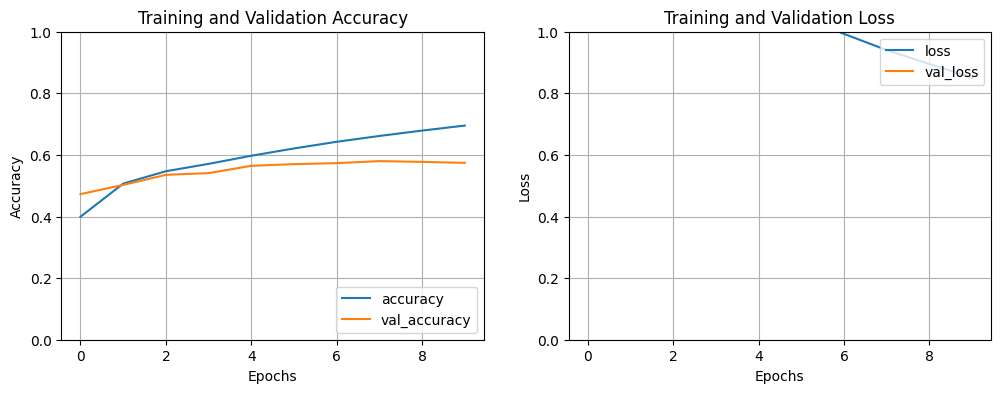

In [21]:
# Step 11 : Plotting the training and validation accuracy and loss values
plt.figure(figsize=(12,4)) # Create a figure with a specified size

plt.subplot(1,2,1) # Create a subplot for accuracy
plt.plot(history.history['accuracy'],label = 'accuracy') # Plot training accuracy
plt.plot(history.history['val_accuracy'],label = 'val_accuracy') # Plot validation accuracy
plt.xlabel('Epochs') # Set x-axis label
plt.ylabel('Accuracy') # Set y-axis label
plt.ylim([0,1]) # Set y-axis limits
plt.legend(loc = 'lower right') # Add legend to the plot
plt.title('Training and Validation Accuracy') # Set title for the accuracy plot
plt.grid() # Add grid lines to the accuracy plot

plt.subplot(1,2,2) # Create a subplot for loss
plt.plot(history.history['loss'],label = 'loss') # Plot training loss
plt.plot(history.history['val_loss'],label = 'val_loss') # Plot validation loss
plt.xlabel('Epochs') # Set x-axis label
plt.ylabel('Loss') # Set y-axis label
plt.ylim([0,1]) # Set y-axis limits
plt.legend(loc = 'upper right') # Add legend to the plot
plt.title('Training and Validation Loss') # Set title for the loss plot
plt.grid() # Add grid lines to the loss plot

plt.show() # Show the plots for accuracy and loss